# Global Image Features

* Author: Johannes Maucher
* Last Update: 10th February 2021

## Categorization Image Features in General

For object recognition and other computer-vision tasks images must be described by one or more numeric representations. These numeric representations should contain the relevant **features** of the image. On an abstract level, the methods to calculate features from a given image can be categorized as follows:

* **Global features:** One numeric representation (vector) is calculated for the entire image. Further recognition/identification applies this single image descriptor as input. Example: Color-Histogram

* **Subwindow features:** The entire image is partitioned into subwindows. For each subwindow one numeric representation is calculated and recognition/identification is performed for each single subwindow.

* **Local features:** A set of numeric representations (vectors) is calculated for a given image. Each of these vectors describes a local area within the image. Further recognition/identification is performed by taking into account the entire set of local descriptors. Example: SIFT-features


The general notion *Object Recognition*, can actually be subdivided into many subtasks. Here and in the next sections, we just distinguish

* **Object recognition:** Determine which object-category, e.g. car, person, building etc. is in the image

* **Identification:** Determine which concrete instance is in the image, e.g. which concrete person

The application of global features in the context of a *Content Based Image Retrieval (CBIR)* system is demonstrated below. For each image a global descriptor is calculated and stored in a database. The task of CBIR is to find for a given query-image the most similar images in the database. For this the global image descriptor is calculated for the query-image and this descriptor is compared with all descriptors (vectors) in the database. The images of the most similar descriptors are returned.

<img src="https://maucher.home.hdm-stuttgart.de/Pics/globalDescriptorRecog.png" style="width:600px" align="center">

## Pixel Intensities
The most direct and obvious form of a global image descriptor to just write the values of all pixels and all channels into a long descriptor-vector. The image below displays only a small section out of such an image descriptor. For the marked image-region (left), the corresponding pixel values are displayed in the right part. For 8-bit images all pixel-values are in the range between 0 and $2^8-1=255$. 

<img src="https://maucher.home.hdm-stuttgart.de/Pics/strawberryIntensities.PNG" style="width:500px" align="center">

Global image descriptors of this type are very long. For an $L-$channel image of size $r \times c$ the length of the desriptor vector is $L \cdot r \cdot c$. E.g. a relatively small RGB-image of size $(200 \times 300)$ has a length of $3 \cdot 200 \cdot 300 = 180000$.

**Drawbacks:** Besides the huge length, this type of descriptor is extremly unrobust with respect to variations in translation, rotation, scale, cropping, background, illumination, contrast and partial occlusion. 

Due to this drawbacks this type of descriptor can hardly be applied for object recognition and identification. An application, for which this descriptor may be useful is change-detection in successive frames of a video.

## Colour Histograms

More robust global descriptors are colour histograms. They can be applied, whenever the color-distribution in images can be assumed to constitute significant information for the given task. 

In contrast to the pixel-intensities-descriptor the histogram is **orderless**, i.e. it does not matter where the color occurs. It is quite robust w.r.t.
- geometric transformations
- moderate view point changes 
- partial occlusion
- contrast change (if intensity-normalized values are used)

It is not robust w.r.t. exposure changes.

### 1-dimensional Histogram

For a given variable $X$ with value-range $V(X)$, the histogram $hist(X)$ counts vor each possible value $x \in V(X)$ the frequency of $x$. 

#### 1-dimensional Histogram of Greyscale Image

For example in an 8-Bit greyscale image $I$ the value range is $V(I)=\left[0,\ldots,255 \right]$ and $h=hist(I)$ is a vector of length $256$, where $h[j]$ is the frequency of value $j$ in $I$. 

Below the [CalcHist()-method from opencv](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html) is applied to calculate the 1-dimensional histogram of a greyscale image. We start with reading the image:

Shape of numpy array : 	 (388, 599)


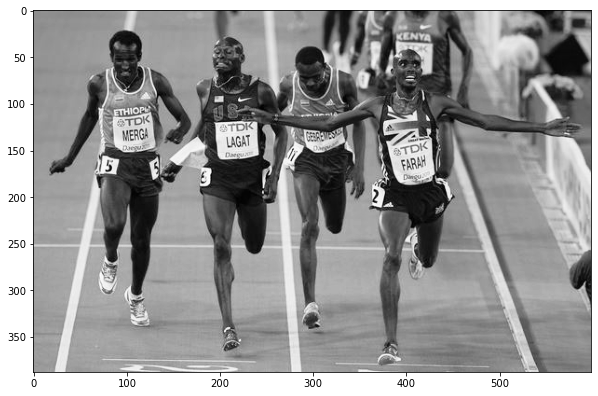

In [1]:
import numpy as np
np.set_printoptions(precision=2,suppress=True)
import cv2
from matplotlib import pyplot as plt
from PIL import Image
imgpath='../Data/mo.png'
pil_im_grey = Image.open(imgpath).convert('L')
np_im_grey=np.array(pil_im_grey)
print("Shape of numpy array : \t", np_im_grey.shape)
plt.figure(figsize=(10,8))
plt.imshow(np_im_grey,cmap='Greys_r')
plt.show()

Next, the 1-dimensional histogram is calculated. In this first version the number of bins is equal to the number of different values 256:

In [19]:
NUMBIN=256 
hist = cv2.calcHist([np_im_grey],[0],None,[NUMBIN],[0,256])
print("Length of histogram: ",len(hist))

Length of histogram:  256


As can be seen the histogram is a 1-dimensional array of length 256. The $j.th$ element of this vector counts how often the pixel-intensity-value $j$ appears in the image. Below the frequency of the pixel intensities 0 to 9 is plotted: 

In [20]:
for j in range(10):
    print("Frequency of value %2d in the image is %3d"%(j,int(hist[j])))

Frequency of value  0 in the image is  20
Frequency of value  1 in the image is  69
Frequency of value  2 in the image is  79
Frequency of value  3 in the image is  90
Frequency of value  4 in the image is 168
Frequency of value  5 in the image is 140
Frequency of value  6 in the image is 156
Frequency of value  7 in the image is 179
Frequency of value  8 in the image is 288
Frequency of value  9 in the image is 469


The histogram can be visualized as follows:

Text(0, 0.5, 'Frequencies')

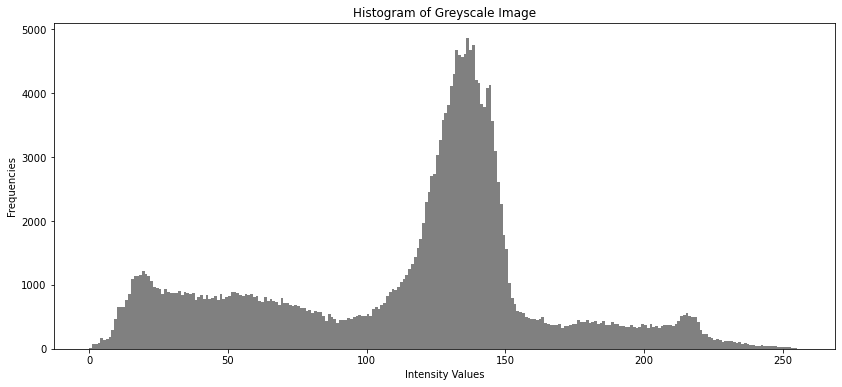

In [21]:
plt.figure(figsize=(14,6))

plt.bar(np.arange(0,NUMBIN),hist[:,0],color="gray",align="edge",width=1.0)
plt.title("Histogram of Greyscale Image")
plt.xlabel("Intensity Values")
#plt.xticks(np.arange(0,256,16))
plt.ylabel("Frequencies")


Now, we reduce the number of bins in the histogram. For this the `calcHist()` method could also be used. However, below we apply a numpy, just to demonstrate that the opencv-way is not the only option.

In [23]:
NUMBIN=16 

In [24]:
hist,bins = np.histogram(np_im_grey.ravel(),NUMBIN,[0,256])

In [25]:
hist

array([ 6345, 16170, 13283, 13234, 11107,  7962, 10996, 32676, 68747,
       24729,  6378,  6515,  5639,  6402,  1727,   502])

In [26]:
bins

array([  0.,  16.,  32.,  48.,  64.,  80.,  96., 112., 128., 144., 160.,
       176., 192., 208., 224., 240., 256.])

**Binning:**

Histograms, as introduced so far, count the frequencies of each possible value. However, it is more common, particularly if the value-range has a high cardinality, to partition the entire value range in bins and count the frequency of values in each bin. 

Below, the entire value-range is subdivided in 16 bins, where each bin comprises 8 adjacent values, e.g. the first bin contains the pixel-intensities from 0 to 7 and the corresponding histograms counts in it's first element how often values between 0 and 7 (inclusive) occur in the image. Similarly, the second component of the histogram counts how often values between 8 and 15 occur in the image, etc.: 

16-Bin Histogram:

In [27]:
hist16bin = cv2.calcHist([np_im_grey],[0],None,[NUMBIN],[0,256])

In [28]:
hist16bin.shape

(16, 1)

In [29]:
hist16bin

array([[ 6345.],
       [16170.],
       [13283.],
       [13234.],
       [11107.],
       [ 7962.],
       [10996.],
       [32676.],
       [68747.],
       [24729.],
       [ 6378.],
       [ 6515.],
       [ 5639.],
       [ 6402.],
       [ 1727.],
       [  502.]], dtype=float32)

Below, the 16-bin and the 32-bin historgrams are visualized:

Text(0, 0.5, 'Frequencies')

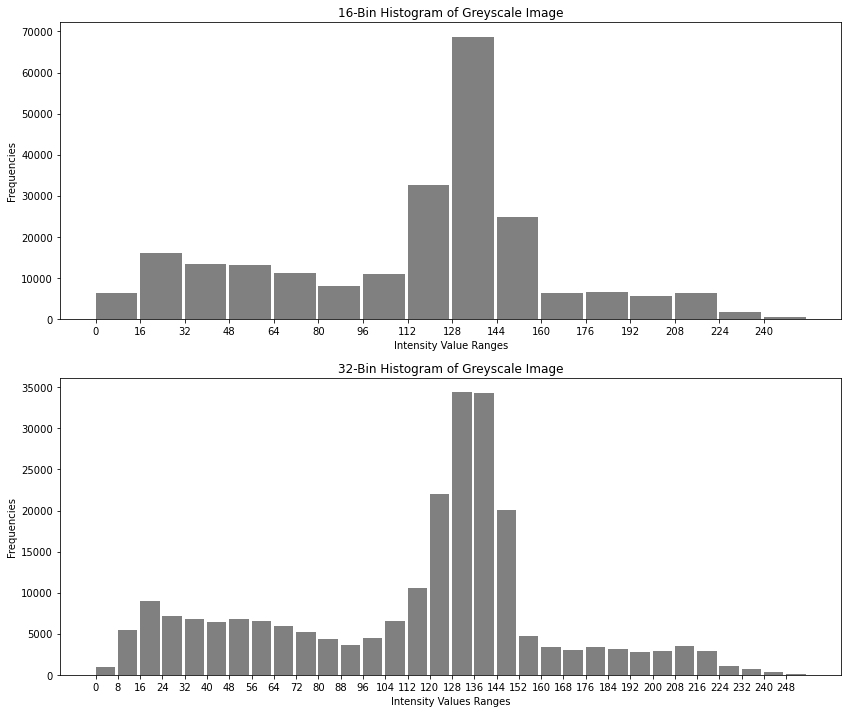

In [30]:
plt.figure(figsize=(14,12))
plt.subplot(2,1,1)
plt.bar(np.arange(0,256,16),hist16bin[:,0],color="gray",align="edge",width=15)
plt.title("16-Bin Histogram of Greyscale Image")
plt.xlabel("Intensity Value Ranges")
plt.xticks(np.arange(0,256,16))
plt.ylabel("Frequencies")

hist32bin = cv2.calcHist([np_im_grey],[0],None,[32],[0,256])
plt.subplot(2,1,2)
plt.bar(np.arange(0,256,8),hist32bin[:,0],color="gray",align="edge",width=7)
plt.title("32-Bin Histogram of Greyscale Image")
plt.xlabel("Intensity Values Ranges")
plt.xticks(np.arange(0,256,8))
plt.ylabel("Frequencies")



#### Histograms of Colour Images

For multichannel images (colour images), there exist two different options to calculate histograms:

1. Calculate a 1-dimensional histogram for each channel. A global image descriptor can then be obtained by concatenating these three 1-d histograms
2. Calulate a multidimensional histogram. In multidimensional histograms the bins are not 1-dimensional but e.g. 3-dimensional for 3-channel images. In each Bin the occurence of tuples $(x,y,z)$ within the bin's range is counted.

We start with the first option. The second option, multidimensional histogram, is described in the next subsection.

**Read colour image:**

Shape of numpy array : 	 (240, 320, 3)


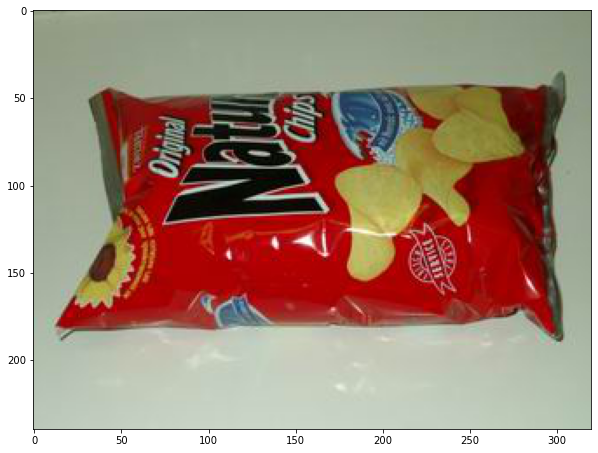

In [31]:
imgpath='../Data/66obj/images/image045.JPG'
pil_im_col= Image.open(imgpath)
np_im_col=np.array(pil_im_col)
print("Shape of numpy array : \t", np_im_col.shape)
plt.figure(figsize=(10,8))
plt.imshow(np_im_col)
plt.show()

**Calculate a 1-dimensional histogram for each of the 3 channels:**

In [33]:
hist16binRed = cv2.calcHist([np_im_col],[0],None,[NUMBIN],[0,256])
hist16binGreen = cv2.calcHist([np_im_col],[1],None,[NUMBIN],[0,256])
hist16binBlue = cv2.calcHist([np_im_col],[2],None,[NUMBIN],[0,256])

**Visualize the three 1-dimensional histograms:**

Text(0, 0.5, 'Frequencies')

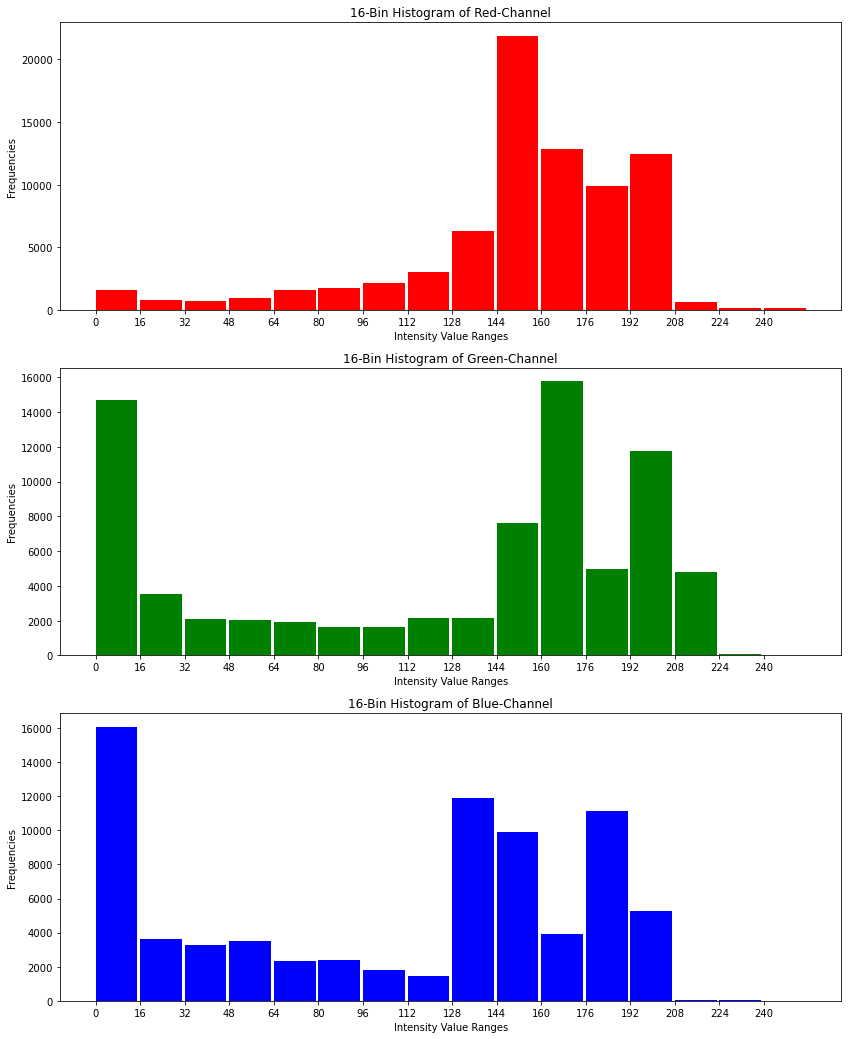

In [36]:
plt.figure(figsize=(14,18))
plt.subplot(3,1,1)
plt.bar(np.arange(0,256,int(256/NUMBIN)),hist16binRed[:,0],color="red",align="edge",width=15)
plt.title(str(NUMBIN)+"-Bin Histogram of Red-Channel")
plt.xlabel("Intensity Value Ranges")
plt.xticks(np.arange(0,256,int(256/NUMBIN)))
plt.ylabel("Frequencies")

plt.subplot(3,1,2)
plt.bar(np.arange(0,256,int(256/NUMBIN)),hist16binGreen[:,0],color="green",align="edge",width=15)
plt.title(str(NUMBIN)+"-Bin Histogram of Green-Channel")
plt.xlabel("Intensity Value Ranges")
plt.xticks(np.arange(0,256,int(256/NUMBIN)))
plt.ylabel("Frequencies")

plt.subplot(3,1,3)
plt.bar(np.arange(0,256,int(256/NUMBIN)),hist16binBlue[:,0],color="blue",align="edge",width=15)
plt.title(str(NUMBIN)+"-Bin Histogram of Blue-Channel")
plt.xlabel("Intensity Value Ranges")
plt.xticks(np.arange(0,256,int(256/NUMBIN)))
plt.ylabel("Frequencies")

**Image Descriptor:**
The global image descriptor in this case is just the concatenation of the three 1-dimensional histograms. Since in the example each histogram is of length 16, the global image descriptor is a one-dimensional vector of length 48.

In [37]:
imageDescriptor1dim=np.concatenate([hist16binRed,hist16binGreen,hist16binBlue])

In [38]:
imageDescriptor1dim.shape

(48, 1)

In [39]:
imageDescriptor1dim

array([[ 1629.],
       [  784.],
       [  738.],
       [  988.],
       [ 1589.],
       [ 1727.],
       [ 2135.],
       [ 2998.],
       [ 6281.],
       [21844.],
       [12831.],
       [ 9859.],
       [12414.],
       [  607.],
       [  189.],
       [  187.],
       [14684.],
       [ 3559.],
       [ 2087.],
       [ 2016.],
       [ 1897.],
       [ 1608.],
       [ 1657.],
       [ 2148.],
       [ 2141.],
       [ 7642.],
       [15759.],
       [ 4946.],
       [11749.],
       [ 4806.],
       [   58.],
       [   43.],
       [16080.],
       [ 3630.],
       [ 3284.],
       [ 3514.],
       [ 2337.],
       [ 2412.],
       [ 1809.],
       [ 1451.],
       [11924.],
       [ 9930.],
       [ 3935.],
       [11121.],
       [ 5280.],
       [   58.],
       [   27.],
       [    8.]], dtype=float32)

### Multi-dimensional Histogram

As already mentioned above, in multidimensional histograms the bins are not 1-dimensional but e.g. 3-dimensional for 3-channel images. In each Bin the occurence of tuples $(x,y,z)$ within the bin's range is counted.

Next, a 3-dimensional histogram with $8 \times 8 \times 8 = 512$ bins is calculated:

In [40]:
histCol = cv2.calcHist([np_im_col],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])

In [41]:
histCol.shape

(8, 8, 8)

The bin `histCol[0,0,0]` counts the number of pixels in the image, for which the values of the red, green and blue channel are in the range between 0 and 15 (inclusive).

In [42]:
histCol[0,0,0]

2208.0

The bin `histCol[7,7,7]` counts the number of pixels in the image, for which the values of the red, green and blue channel are in the range between 240 and 255 (inclusive).

In [43]:
histCol[7,7,7]

33.0

**Image Descriptor:**
The global image descriptors are just the serializations of the multidimensional histograms:

In [44]:
imageDescriptor3dim=histCol.flatten()
print("Length of the global image descriptor: ",imageDescriptor3dim.shape)

Length of the global image descriptor:  (512,)


**Visualization of 3-dimensional Color Histogram:**

The function `plot3Dhistogram()`, defined below, can be applied to visualize the 3-dimensional histogram:  

In [45]:
def plot3Dhistogram(h,fig=None):
    
    """
    Visualize a 3D histogram

    Parameters
    ----------
    h: histogram array of shape (M,N,O)
    
    Note, that M,N and O must be either 2,4,8,16,32,64 or 128 
    """
    M, N, O = h.shape
    idxR = np.arange(M)
    idxG = np.arange(N)
    idxB = np.arange(O)

    R, G, B = np.meshgrid(idxR, idxG, idxB)
    #a = np.diff(e[0])[0]
    a=256/M
    b = a/2
    R = a * R + b

    a = 256/N
    b = a/2
    G = a * G + b

    a = 256/O
    b = a/2
    B = a * B + b

    colors = np.vstack((R.flatten(), G.flatten(), B.flatten())).T/255
    h = h / np.sum(h)
    if fig is not None:
        f = plt.figure(fig)
    else:
        f = plt.gcf()
    ax = f.add_subplot(111, projection='3d')     
    mxbins = np.array([M,N,O]).max()
    ax.scatter(R.flatten(), G.flatten(), B.flatten(), s=h.flatten()*(256/mxbins)**3/2, c=colors)

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')

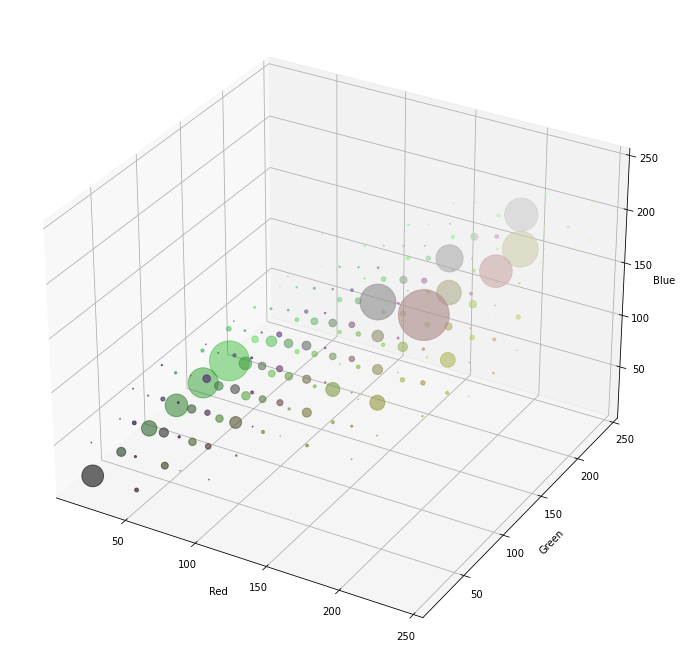

In [46]:
plt.figure(figsize=(12,12))
plot3Dhistogram(histCol,fig=None)
plt.show()

**Application:**

A common application of global image descriptors from multidimensional color-histograms is **Content Based Image Retrieval (CBIR)**. Here, the task is to find an arbitrary query-image the most similar image(s) in a given image-database. In the case that images are described by their 3-dimensional color-histograms CBIR requires a **method to determine similarity** between histograms. In [section Similarity Measures](similarityMetrics.ipynb) common metrics to measure similarity between vectors in general and histograms in particular are described. In [section Image Retrieval](ImageRetrieval.ipynb) a CBIR based on 3-dimensioanl color-histograms is implemented and evaluated for different similarity metrics.